### Data Preparation

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

data = pd.read_csv('boston.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [20]:
print(data.shape, data.isna().values.any(), data.duplicated().values.any())

(506, 14) False False


In [21]:
# Split data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

### Least Mean Squares

In [61]:
def lms(dataset, weights, lr, max_iterate=500, bias=None): 
  # i = 0
  N = len(list(dataset))
  # alpha = [0.1, 0.01, 0.001]
  # Emax = 10000000000000000000000000
  # maxIter = 500
  E = 0
  # while ((i < maxIter) and (E < Emax)):
  #   E = 0
  for data, label in dataset:
    y = np.dot(weights.transpose(), data)
    #print('y: ')
    #print(y)
    #print('==================')
    weights = weights + lr*np.dot((label - y), data)
    #print('weight: ' + str(w))
    E = E + np.power((label - y), 2)/(2*N)
    #print('Error: ' + str(E))
  #Put the error in the array after going thru the whole training pattern
  # error_grp.append(E)
  # iter_grp.append(i)
  # i = i + 1
  #print('i: ' + str(i))

  print('error: {}, weight:{}'.format(E, weights))
  # print('weight: {}' + str(w))
  return weights, E

In [62]:
weights = np.random.rand(X_train.shape[1])
bias = np.random.rand(1)
learning_rate = 0.01

In [63]:
weights

array([0.36325307, 0.76724072, 0.10276403, 0.75803742, 0.43261727,
       0.78643254, 0.59362288, 0.8936587 , 0.38952154, 0.26542474,
       0.0728863 , 0.0095088 , 0.25360232])

In [64]:
# No bias
num_epochs = 100
weight_history = []
bias_history = []
error_history = []

for epoch in range(num_epochs):
    print("==== epoch: {} ====".format(epoch))
    weights, loss = lms(zip(X_train, y_train), weights, learning_rate)
    
    weight_history.append(weights.copy())
    # bias_history.append(bias.copy())
    error_history.append(loss)
    break

==== epoch: 0 ====
error: 0, weight:[0.36325307 0.76724072 0.10276403 0.75803742 0.43261727 0.78643254
 0.59362288 0.8936587  0.38952154 0.26542474 0.0728863  0.0095088
 0.25360232]


In [60]:
# Adding bias


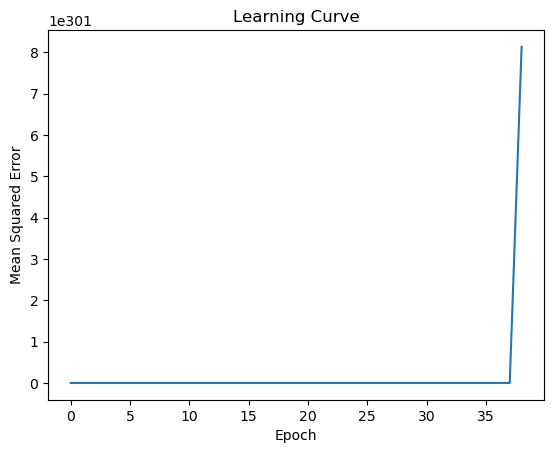

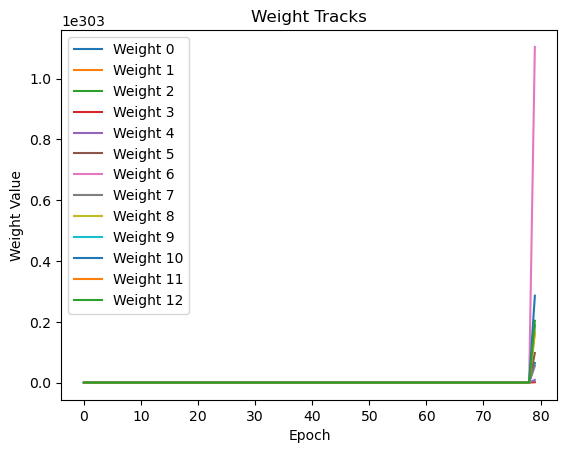

In [27]:
import matplotlib.pyplot as plt

# Plotting the learning curve
plt.figure()
plt.plot(error_history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.show()

# Plotting the weight tracks
plt.figure()
for i in range(X_train.shape[1]):
    plt.plot([w[i] for w in weight_history], label=f'Weight {i}')
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.title('Weight Tracks')
plt.legend()
plt.show()